In [6]:
!pip install selenium
!pip install webdriver_manager


In [7]:
#Q1
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

def search_amazon(product):
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)
    url = "https://www.amazon.in/"
    driver.get(url)
    search_box = driver.find_element(By.ID, "twotabsearchtextbox")
    search_box.send_keys(product)
    search_box.send_keys(Keys.RETURN)
    time.sleep(2)
    products = driver.find_elements(By.CSS_SELECTOR, '.s-result-item')
    for product in products:
        title = product.find_element(By.CSS_SELECTOR, 'span.a-text-normal').text.strip()
        try:
            price = product.find_element(By.CSS_SELECTOR, 'span.a-price .a-offscreen').text.strip()
        except:
            price = '-'
        try:
            rating = product.find_element(By.CSS_SELECTOR, 'span.a-icon-alt').text.strip()
        except:
            rating = '-'

        print("Title:", title)
        print("Price:", price)
        print("Rating:", rating)
        print()
    driver.quit()

if __name__ == "__main__":
    user_input = input("Enter the product to search: ")
    search_amazon(user_input)
    

Enter the product to search: guitar


NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"span.a-text-normal"}
  (Session info: chrome=120.0.6099.225); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x01226EE3+174339]
	(No symbol) [0x01150A51]
	(No symbol) [0x00E66FF6]
	(No symbol) [0x00E99876]
	(No symbol) [0x00E99C2C]
	(No symbol) [0x00E92631]
	(No symbol) [0x00EB7054]
	(No symbol) [0x00E925B0]
	(No symbol) [0x00EB7414]
	(No symbol) [0x00ECA104]
	(No symbol) [0x00EB6DA6]
	(No symbol) [0x00E91034]
	(No symbol) [0x00E91F8D]
	GetHandleVerifier [0x012C4B1C+820540]
	sqlite3_dbdata_init [0x013853EE+653550]
	sqlite3_dbdata_init [0x01384E09+652041]
	sqlite3_dbdata_init [0x013797CC+605388]
	sqlite3_dbdata_init [0x01385D9B+656027]
	(No symbol) [0x0115FE6C]
	(No symbol) [0x011583B8]
	(No symbol) [0x011584DD]
	(No symbol) [0x01145818]
	BaseThreadInitThunk [0x75DF7BA9+25]
	RtlInitializeExceptionChain [0x774ABD2B+107]
	RtlClearBits [0x774ABCAF+191]


In [ ]:
#Q2
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

def scrape_amazon_products(product):
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)

    base_url = "https://www.amazon.in/"
    search_url = base_url + f"s?k={product.replace(' ', '+')}"

    brand_names = []
    product_names = []
    prices = []
    return_exchange = []
    expected_delivery = []
    availabilities = []
    product_urls = []

    for page_num in range(1, 4):
        url = f"{search_url}&page={page_num}"
        driver.get(url)
        time.sleep(2) 
        products = driver.find_elements(By.CSS_SELECTOR, '.s-result-item')

        for product in products:
            try:
                brand_name = product.find_element(By.CSS_SELECTOR, 'span.a-size-base+ .a-size-base').text.strip()
            except:
                brand_name = '-'
            try:
                product_name = product.find_element(By.CSS_SELECTOR, 'span.a-text-normal').text.strip()
            except:
                product_name = '-'
            try:
                price = product.find_element(By.CSS_SELECTOR, 'span.a-price .a-offscreen').text.strip()
            except:
                price = '-'
            try:
                return_exchange_info = product.find_element(By.CSS_SELECTOR, 'div.a-row.a-size-base.a-color-secondary').text.strip()
            except:
                return_exchange_info = '-'
            try:
                expected_delivery_info = product.find_element(By.CSS_SELECTOR, 'div.a-row:nth-child(3) span.a-text-bold').text.strip()
            except:
                expected_delivery_info = '-'
            try:
                availability = product.find_element(By.CSS_SELECTOR, 'div.a-row:nth-child(3) .a-text-bold+ .a-size-base').text.strip()
            except:
                availability = '-'
            try:
                product_url = product.find_element(By.CSS_SELECTOR, 'span.a-text-normal a').get_attribute('href')
            except:
                product_url = '-'

            brand_names.append(brand_name)
            product_names.append(product_name)
            prices.append(price)
            return_exchange.append(return_exchange_info)
            expected_delivery.append(expected_delivery_info)
            availabilities.append(availability)
            product_urls.append(product_url)

    data = {
        'Brand Name': brand_names,
        'Name of the Product': product_names,
        'Price': prices,
        'Return/Exchange': return_exchange,
        'Expected Delivery': expected_delivery,
        'Availability': availabilities,
        'Product URL': product_urls
    }
    df = pd.DataFrame(data)

    df.to_csv('amazon_products.csv', index=False)

    driver.quit()

if __name__ == "__main__":
 
    user_input = input("Enter the product to search: ")


    scrape_amazon_products(user_input)


Enter the product to search: guitar


Scraping images for 'fruits'...
Google Images opened
Keyword 'fruits' entered and search initiated
Scrolling to load more images...
Scrolling to load more images...
Scrolling to load more images...
Found 300 image elements
Directory 'images_fruits' created
Error downloading image 1 for 'fruits': No connection adapters were found for ''
Error downloading image 2 for 'fruits': No connection adapters were found for ''
Error downloading image 3 for 'fruits': No connection adapters were found for ''
Error downloading image 4 for 'fruits': No connection adapters were found for ''
Error downloading image 5 for 'fruits': No connection adapters were found for ''
Error downloading image 6 for 'fruits': No connection adapters were found for ''
Error downloading image 7 for 'fruits': No connection adapters were found for ''
Error downloading image 8 for 'fruits': No connection adapters were found for ''
Error downloading image 9 for 'fruits': No connection adapters were found for ''
Error download
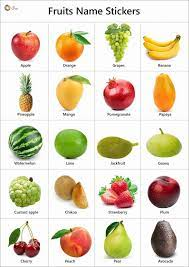
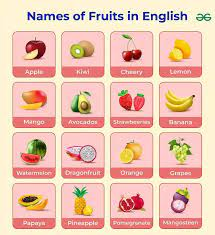
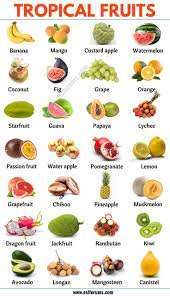
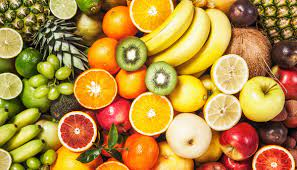
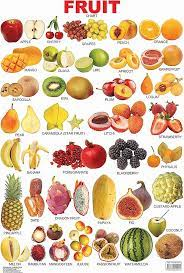
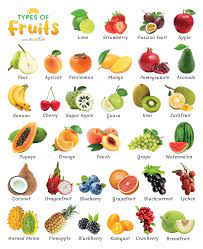
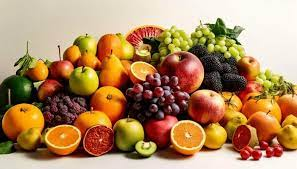
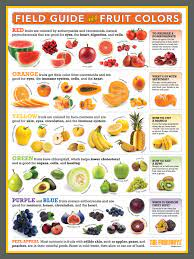
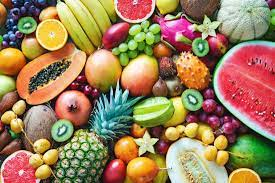
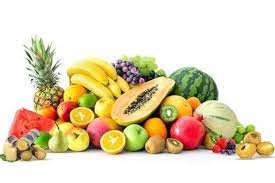
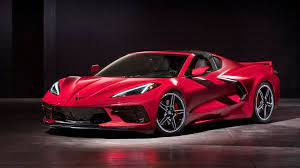
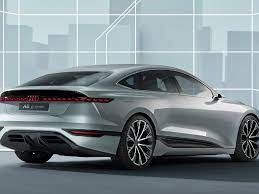
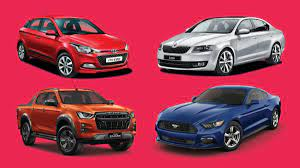
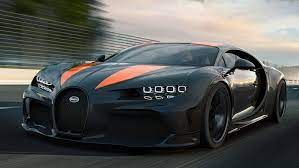
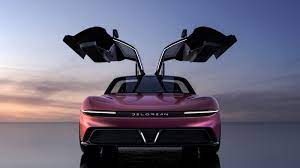
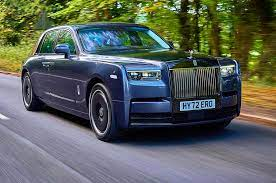
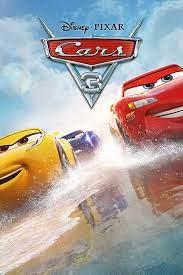
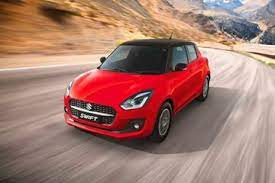
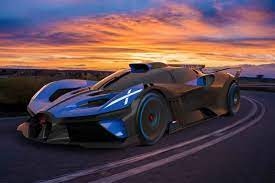
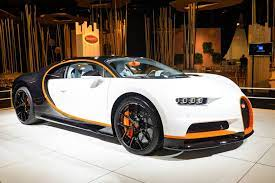
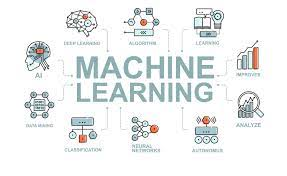
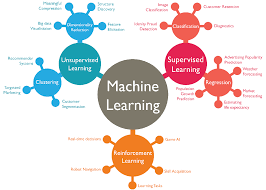
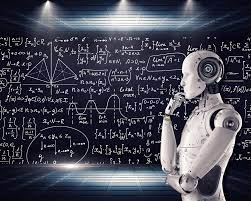
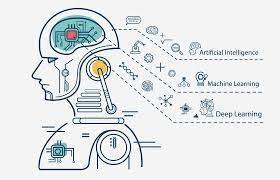
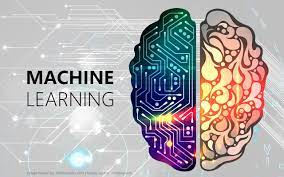
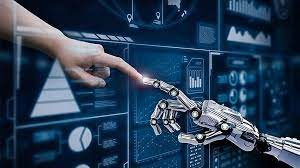
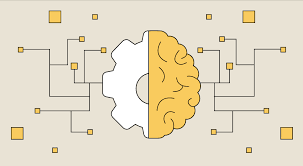
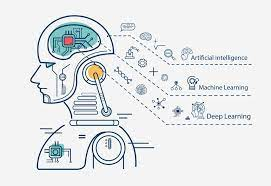
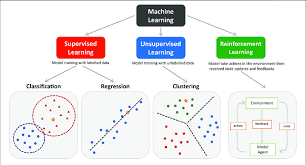
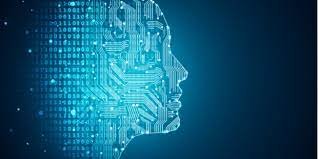

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=120.0.6099.225)
Stacktrace:
	GetHandleVerifier [0x01226EE3+174339]
	(No symbol) [0x01150A51]
	(No symbol) [0x00E66FF6]
	(No symbol) [0x00E4EFE7]
	(No symbol) [0x00EBB53B]
	(No symbol) [0x00EC9E7B]
	(No symbol) [0x00EB6DA6]
	(No symbol) [0x00E91034]
	(No symbol) [0x00E91F8D]
	GetHandleVerifier [0x012C4B1C+820540]
	sqlite3_dbdata_init [0x013853EE+653550]
	sqlite3_dbdata_init [0x01384E09+652041]
	sqlite3_dbdata_init [0x013797CC+605388]
	sqlite3_dbdata_init [0x01385D9B+656027]
	(No symbol) [0x0115FE6C]
	(No symbol) [0x011583B8]
	(No symbol) [0x011584DD]
	(No symbol) [0x01145818]
	BaseThreadInitThunk [0x75DF7BA9+25]
	RtlInitializeExceptionChain [0x774ABD2B+107]
	RtlClearBits [0x774ABCAF+191]


In [1]:
#Q3
!pip install selenium
!pip install webdriver_manager
import os
import time
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

def scrape_images(keyword, num_images=10):
    print(f"Scraping images for '{keyword}'...")
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)

    driver.get("https://images.google.com/")
    print("Google Images opened")
    time.sleep(2)

    search_bar = driver.find_element(By.NAME, "q")
    search_bar.clear()
    search_bar.send_keys(keyword)
    search_bar.send_keys(Keys.RETURN)
    print(f"Keyword '{keyword}' entered and search initiated")
    time.sleep(2)

    scroll_count = 0
    while scroll_count < 3:  
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        print("Scrolling to load more images...")
        time.sleep(2)
        scroll_count += 1

    soup = BeautifulSoup(driver.page_source, 'html.parser')

    image_elements = soup.find_all('img', {'class': 'rg_i'})
    print(f"Found {len(image_elements)} image elements")

    directory = f'images_{keyword}'
    if not os.path.exists(directory):
        os.makedirs(directory)
    print(f"Directory '{directory}' created")

    for i, image_element in enumerate(image_elements[:num_images], start=1):
        image_url = image_element['src']
        image_path = os.path.join(directory, f'{keyword}_{i}.jpg')
        try:
         
            response = requests.get(image_url)
            with open(image_path, 'wb') as f:
                f.write(response.content)
            print(f"Downloaded image {i} for '{keyword}'")
        except Exception as e:
            print(f"Error downloading image {i} for '{keyword}': {e}")

    driver.quit()
    print("Browser closed")

if __name__ == "__main__":
    keywords = ['fruits', 'cars', 'Machine Learning', 'Guitar', 'Cakes']
    for keyword in keywords:
        scrape_images(keyword, num_images=10)

In [2]:
#Q4

import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

def scrape_flipkart_smartphones(search_query):
  
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)

    url = f"https://www.flipkart.com/search?q={search_query}&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"

    driver.get(url)
    time.sleep(2)  

    brand_names = []
    smartphone_names = []
    colors = []
    rams = []
    roms = []
    primary_cameras = []
    secondary_cameras = []
    display_sizes = []
    battery_capacities = []
    prices = []
    product_urls = []

    products = driver.find_elements(By.XPATH, '//div[@class="_1AtVbE"]')

    for product in products:
        try:
            brand_name = product.find_element(By.XPATH, './/div[@class="_4rR01T"]').text.strip()
        except:
            brand_name = '-'

        try:
            smartphone_name = product.find_element(By.XPATH, './/a[@class="IRpwTa"]').text.strip()
        except:
            smartphone_name = '-'

        try:
            color = product.find_element(By.XPATH, './/a[@class="IRpwTa"]/following-sibling::a').text.strip()
        except:
            color = '-'

        try:
            details = product.find_element(By.XPATH, './/ul[@class="_1xgFaf"]//li[1]').text
            ram = details.split('|')[0].strip()
            rom = details.split('|')[1].strip()
        except:
            ram = '-'
            rom = '-'

        try:
            primary_camera = product.find_element(By.XPATH, './/ul[@class="_1xgFaf"]//li[3]').text.strip()
        except:
            primary_camera = '-'

        try:
            secondary_camera = product.find_element(By.XPATH, './/ul[@class="_1xgFaf"]//li[4]').text.strip()
        except:
            secondary_camera = '-'

        try:
            display_size = product.find_element(By.XPATH, './/ul[@class="_1xgFaf"]//li[2]').text.strip()
        except:
            display_size = '-'

        try:
            battery_capacity = product.find_element(By.XPATH, './/ul[@class="_1xgFaf"]//li[5]').text.strip()
        except:
            battery_capacity = '-'

        try:
            price = product.find_element(By.XPATH, './/div[@class="_30jeq3 _1_WHN1"]').text.strip()
        except:
            price = '-'

        try:
            product_url = product.find_element(By.XPATH, './/a[@class="IRpwTa"]').get_attribute('href')
        except:
            product_url = '-'

        brand_names.append(brand_name)
        smartphone_names.append(smartphone_name)
        colors.append(color)
        rams.append(ram)
        roms.append(rom)
        primary_cameras.append(primary_camera)
        secondary_cameras.append(secondary_camera)
        display_sizes.append(display_size)
        battery_capacities.append(battery_capacity)
        prices.append(price)
        product_urls.append(product_url)

    data = {
        'Brand Name': brand_names,
        'Smartphone Name': smartphone_names,
        'Colour': colors,
        'RAM': rams,
        'Storage(ROM)': roms,
        'Primary Camera': primary_cameras,
        'Secondary Camera': secondary_cameras,
        'Display Size': display_sizes,
        'Battery Capacity': battery_capacities,
        'Price': prices,
        'Product URL': product_urls
    }
    df = pd.DataFrame(data)

    df.to_csv('flipkart_smartphones.csv', index=False)

    driver.quit()

if __name__ == "__main__":
    
    user_input = input("Enter the smartphone to search: ")

    scrape_flipkart_smartphones(user_input)


Enter the smartphone to search: iphone


In [3]:
#Q5
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

def scrape_coordinates(city):
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)

    url = "https://www.google.com/maps"

    # Open the URL
    driver.get(url)
    time.sleep(2) 
    search_box = driver.find_element_by_xpath("//input[@autofocus='autofocus']")
    search_box.clear()
    search_box.send_keys(city)
    search_box.send_keys(Keys.RETURN)
    time.sleep(2)  
    current_url = driver.current_url

    try:
        latitude = current_url.split('@')[1].split(',')[0]
        longitude = current_url.split('@')[1].split(',')[1].split(',')[0]
        print(f"Latitude: {latitude}, Longitude: {longitude}")
    except Exception as e:
        print(f"Error extracting coordinates: {e}")

    driver.quit()

if __name__ == "__main__":
    
    user_input = input("Enter the city to search: ")

    scrape_coordinates(user_input)


Enter the city to search: vatican


AttributeError: 'WebDriver' object has no attribute 'find_element_by_xpath'

In [6]:
#Q6
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_gaming_laptops():
  
    url = "https://www.digit.in/top-products/best-gaming-laptops-40.html"

    response = requests.get(url)

    soup = BeautifulSoup(response.content, 'html.parser')

    products = soup.find_all('div', class_='TopNumbeHeading sticky-footer')

    names = []
    prices = []
    descriptions = []

    for product in products:
        name = product.find('div', class_='TopNumbeHeading sticky-footer').text.strip()
        price = product.find('div', class_='TopNumbeHeading sticky-footer').text.strip()
        description = product.find('div', class_='TopNumbeHeading sticky-footer').text.strip()
        
        names.append(name)
        prices.append(price)
        descriptions.append(description)

    data = {
        'Name': names,
        'Price': prices,
        'Description': descriptions
    }
    df = pd.DataFrame(data)

    df.to_csv('gaming_laptops.csv', index=False)

if __name__ == "__main__":
    scrape_gaming_laptops()


In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_gaming_laptops():
 

    url = "https://www.digit.in/top-products/best-gaming-laptops-40.html"


    response = requests.get(url)

    soup = BeautifulSoup(response.content, 'html.parser')

    products = soup.find_all('div', class_='Top10-Seller')

    names = []
    prices = []
    descriptions = []

    for product in products:
        try:
            name = product.find('div', class_='right-container').find('h3').text.strip()
        except AttributeError:
            name = '-'

        try:
            price = product.find('div', class_='smprice').text.strip()
        except AttributeError:
            price = '-'

        try:
            description = product.find('p', class_='description').text.strip()
        except AttributeError:
            description = '-'
        
        names.append(name)
        prices.append(price)
        descriptions.append(description)

    data = {
        'Name': names,
        'Price': prices,
        'Description': descriptions
    }
    df = pd.DataFrame(data)

    df.to_csv('gaming_laptops.csv', index=False)

if __name__ == "__main__":
    scrape_gaming_laptops()


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_gaming_laptops():
  
    url = "https://www.digit.in/top-products/best-gaming-laptops-40.html"

    response = requests.get(url)

    soup = BeautifulSoup(response.content, 'html.parser')

    products = soup.find_all('div', class_='TopNumbeHeading sticky-footer')
    print("Number of products found:", len(products))

    names = []
    prices = []
    descriptions = []

    for product in products:
        print("Product:", product)
        try:
            name = product.find('div', class_='TopNumbeHeading sticky-footer').text.strip()
        except AttributeError:
            name = '-'
        print("Name:", name)

        try:
            price = product.find('div', class_='TopNumbeHeading sticky-footer').text.strip()
        except AttributeError:
            price = '-'
        print("Price:", price)

        try:
            description = product.find('div', class_='TopNumbeHeading sticky-footer').text.strip()
        except AttributeError:
            description = '-'
        print("Description:", description)
        
        names.append(name)
        prices.append(price)
        descriptions.append(description)

    data = {
        'Name': names,
        'Price': prices,
        'Description': descriptions
    }
    df = pd.DataFrame(data)

    df.to_csv('gaming_laptops.csv', index=False)

if __name__ == "__main__":
    scrape_gaming_laptops()


Number of products found: 0


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_gaming_laptops():
   
    url = "https://www.digit.in/top-products/best-gaming-laptops-40.html"

    response = requests.get(url)

    soup = BeautifulSoup(response.content, 'html.parser')

    products = soup.find_all('div', class_='Top2020-Seller')
    print("Number of products found:", len(products))

    names = []
    prices = []
    descriptions = []

    for product in products:
        name = product.find('div', class_='Top2020-Seller-name').text.strip()
        price = product.find('div', class_='Top2020-Seller-price').text.strip()
        description = product.find('div', class_='Top2020-Seller-description').text.strip()
        
        names.append(name)
        prices.append(price)
        descriptions.append(description)

    data = {
        'Name': names,
        'Price': prices,
        'Description': descriptions
    }
    df = pd.DataFrame(data)

    df.to_csv('gaming_laptops.csv', index=False)

if __name__ == "__main__":
    scrape_gaming_laptops()


Number of products found: 0


In [11]:
#Q7
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_forbes_billionaires():
    url = "https://www.forbes.com/billionaires/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    rows = soup.find_all('div', class_='personName')

    print("Number of rows found:", len(rows))

    ranks = []
    names = []
    net_worths = []
    ages = []
    citizenships = []
    sources = []
    industries = []

    for row in rows:
        print("Row:", row)
        rank = row.find_previous('div', class_='rank').text.strip()
        name = row.find('div', class_='name').text.strip()
        net_worth = row.find_next('div', class_='netWorth').text.strip()
        age = row.find_next('div', class_='age').text.strip()
        citizenship = row.find_next('div', class_='countryOfCitizenship').text.strip()
        source = row.find_next('div', class_='source').text.strip()
        industry = row.find_next('div', class_='category').text.strip()

        ranks.append(rank)
        names.append(name)
        net_worths.append(net_worth)
        ages.append(age)
        citizenships.append(citizenship)
        sources.append(source)
        industries.append(industry)

    data = {
        'Rank': ranks,
        'Name': names,
        'Net Worth': net_worths,
        'Age': ages,
        'Citizenship': citizenships,
        'Source': sources,
        'Industry': industries
    }
    df = pd.DataFrame(data)
    df.to_csv('forbes_billionaires.csv', index=False)

if __name__ == "__main__":
    scrape_forbes_billionaires()

    

Number of rows found: 0


In [13]:
#Q8
!pip install google-api-python-client
!pip install google-auth-oauthlib
import os
import json
import google_auth_oauthlib.flow
import googleapiclient.discovery
import googleapiclient.errors

# Set the path to your client secrets JSON file
CLIENT_SECRETS_FILE = 'client_secrets.json'
SCOPES = ['https://www.googleapis.com/auth/youtube.readonly']

def get_authenticated_service():
    flow = google_auth_oauthlib.flow.InstalledAppFlow.from_client_secrets_file(
        CLIENT_SECRETS_FILE, SCOPES)
    credentials = flow.run_console()
    return googleapiclient.discovery.build('youtube', 'v3', credentials=credentials)

def get_video_comments(service, **kwargs):
    comments = []
    results = service.commentThreads().list(**kwargs).execute()

    while results:
        for item in results['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            comments.append((comment['textDisplay'], comment['likeCount'], comment['publishedAt']))

        if 'nextPageToken' in results:
            kwargs['pageToken'] = results['nextPageToken']
            results = service.commentThreads().list(**kwargs).execute()
        else:
            break

    return comments

if __name__ == "__main__":
    os.environ['OAUTHLIB_INSECURE_TRANSPORT'] = '1'
    service = get_authenticated_service()
    
    video_id = input("Enter the YouTube video ID: ")
    comments = get_video_comments(service, part='snippet', videoId=video_id, maxResults=500)
    
    for comment in comments:
        print("Comment:", comment[0])
        print("Upvotes:", comment[1])
        print("Time:", comment[2])
        print()


     ------------------------------------ 151.7/151.7 kB 822.4 kB/s eta 0:00:00


FileNotFoundError: [Errno 2] No such file or directory: 'client_secrets.json'

In [14]:
#Q9
import requests
from bs4 import BeautifulSoup

def scrape_hostels_in_london():
  
    url = 'https://www.hostelworld.com/s?q=London,%20England&country=England&city=London&type=city&id=3&from=2022-03-02&to=2022-03-03&guests=1&page=1'

    response = requests.get(url)

    soup = BeautifulSoup(response.text, 'html.parser')


    hostel_containers = soup.find_all('div', class_='hwta-property')


    hostels_data = []

    for hostel in hostel_containers:
   
        name = hostel.find('h2', class_='hwta-property-title').text.strip()

        distance = hostel.find('span', class_='hwta-property-distance').text.strip()

        rating = hostel.find('span', class_='hwta-rating-score').text.strip()

        total_reviews = hostel.find('span', class_='hwta-total-reviews').text.strip()

        overall_reviews = hostel.find('div', class_='hwta-ratings').text.strip()

        privates_price = hostel.find('div', class_='hwta-prices').find('span', class_='privates from-price').text.strip()

        dorms_price = hostel.find('div', class_='hwta-prices').find('span', class_='dorms from-price').text.strip()

        facilities = ', '.join([item.text.strip() for item in hostel.find_all('span', class_='hwta-facilities')])

        description = hostel.find('div', class_='hwta-description').text.strip()

        hostel_data = {
            'Name': name,
            'Distance from City Centre': distance,
            'Rating': rating,
            'Total Reviews': total_reviews,
            'Overall Reviews': overall_reviews,
            'Privates from Price': privates_price,
            'Dorms from Price': dorms_price,
            'Facilities': facilities,
            'Description': description
        }

        hostels_data.append(hostel_data)

    return hostels_data

if __name__ == "__main__":
    hostels_data = scrape_hostels_in_london()
    for hostel in hostels_data:
        print(hostel)
